# NEW HOTS 05 - Testing different architectures on N-MNIST

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import os
import pickle
from mix_Network import *

dataset = 'nmnist'

# 1. Hots with homeostasis (best results of nbk NH 04)

0.7
0.6
None


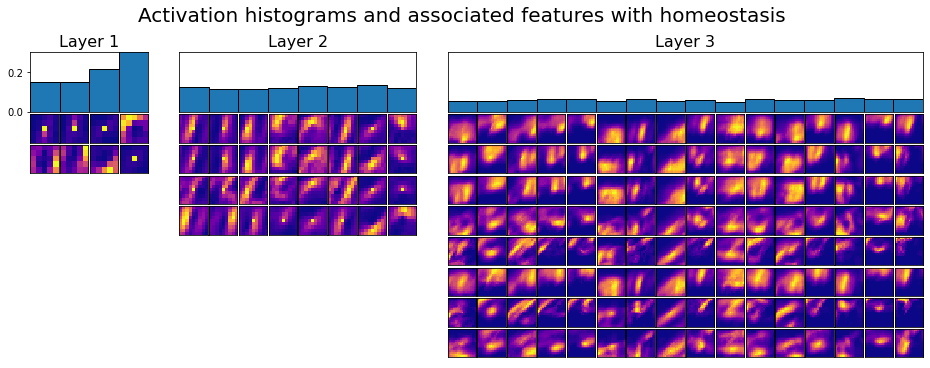

In [12]:
tau = 1
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1()
    trainmaphom, loaderhom = hotshom.training(loaderhom)
    testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
hotshom.plotlayer()
print(accuracy(trainmaphom, testmaphom, 'bhatta'))
print(knn(trainmaphom, testmaphom, k=3))

## 1.1 Testing different tauz

In [4]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    print(fname)
    if not os.path.isfile(fname):
        loaderhom = hotshom.learning1by1()
        trainmaphom, loaderhom = hotshom.training(loaderhom)
        testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
        with open(fname, 'wb') as file:
            pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)
        print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst0.1True[4, 8, 16].pkl


/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS/mix_Network.py:390: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(hist1*hist2)))


0.1
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst0.5True[4, 8, 16].pkl
0.5
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst1True[4, 8, 16].pkl
0.7
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst2True[4, 8, 16].pkl
0.325
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[4, 8, 16].pkl
0.8
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst10True[4, 8, 16].pkl
0.575


## 1.2 Testing different architectures

In [5]:
homeo = True
tau = 5
for nblayerz in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
        arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
        fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
        print(fname)
        if not os.path.isfile(fname):
            loaderhom = hotshom.learning1by1()
            trainmaphom, loaderhom = hotshom.training(loaderhom)
            testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
            with open(fname, 'wb') as file:
                pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
        else:
            with open(fname, 'rb') as file:
                hotshom, trainmaphom, testmaphom = pickle.load(file)
            print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[4].pkl
0.15
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[8].pkl
0.35
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[16].pkl
0.35
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[4, 8].pkl
0.4
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[8, 16].pkl
0.375
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[16, 32].pkl
0.425
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[4, 8, 16].pkl
0.8
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[8, 16, 32].pkl
0.575
../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5True[16, 32, 64].pkl
0.65


In [ ]:
homeo = True
tau = 5#for tau in [0.1, 0.5, 1, 2, 5, 10]:
for nblayerz in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
        arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
        fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
        print(fname)
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)
        accb = 

# 2. Filtering all TS on the best results

In [6]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_filtall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1(filtering='all')
    trainmaphom, loaderhom = hotshom.training(loaderhom)
    testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_filtall_nmnistfirst5True[4, 8, 16].pkl
0.525


# 3. Stronger filter on the best results

In [7]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust, filt=5)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_filtallx5_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1(filtering='all')
    trainmaphom, loaderhom = hotshom.training(loaderhom)
    testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_filtallx5_nmnistfirst5True[4, 8, 16].pkl
0.525


# 4. No homeostasis on the best results

In [8]:
homeo = False
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1()
    trainmaphom, loaderhom = hotshom.training(loaderhom)
    testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_nmnistfirst5False[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [05:36<00:00,  8.40s/it]


bhatta:27.500000000000004% - eucli:30.0% - norm:32.5%


# 5. Training all layers at the same time

In [3]:
homeo = False
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learningall()
    trainmaphom, loaderhom = hotshom.training(loaderhom)
    testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst5False[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [05:05<00:00,  7.64s/it]


bhatta:30.0% - eucli:37.5% - norm:35.0%


In [4]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learningall()
    trainmaphom, loaderhom = hotshom.training(loaderhom)
    testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_nmnistfirst5True[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [05:04<00:00,  7.62s/it]


bhatta:65.0% - eucli:67.5% - norm:65.0%


# 6. Training on more videos

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [05:54<00:00,  8.87s/it]


bhatta:65.0% - eucli:65.0% - norm:65.0%


0.65

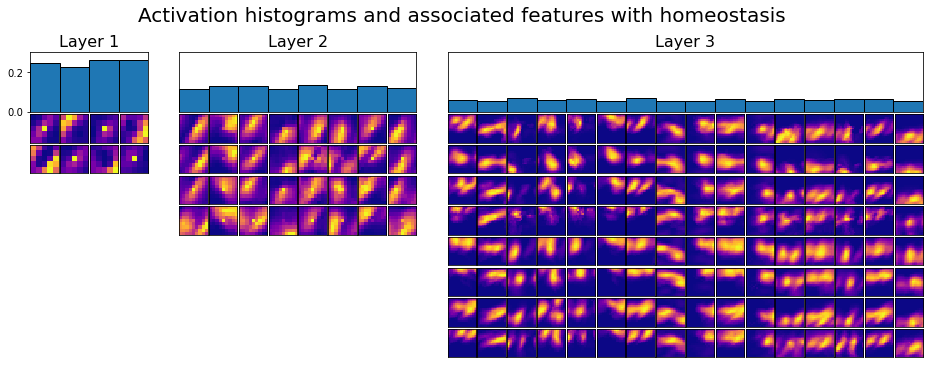

In [5]:
tau = 5
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_200_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1()
    trainmaphom, loaderhom = hotshom.training(loaderhom, nb_digit = 200)
    testmaphom, loaderhom = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
hotshom.plotlayer()
accuracy(trainmaphom, testmaphom, 'bhatta')

0.525
